In [30]:
# - load useful libraries
import xarray as xr
import numpy as np
import powerspec as ps
import matplotlib.pyplot as plt
import urllib.request
%matplotlib inline
%autosave 60

Autosaving every 60 seconds


In [ ]:
import dask
import dask.threaded
import dask.multiprocessing
from dask.distributed import Client, LocalCluster

cluster = LocalCluster(n_workers=5)
client = Client(cluster)
client

In [22]:
data_dir='../data/'
cur_dir,=!pwd

In [ ]:
!ls '../data/'

In [23]:
# - get data into the data directory
%cd $data_dir
!wget "https://ige-meom-opendap.univ-grenoble-alpes.fr/thredds/fileServer/meomopendap/extract/ACO/eNATL60-BLBT02/eNATL60ACO-BLBT02_y2010m03d02.1h_sossheig.nc"
%cd $cur_dir

/Users/adekunle/Projects/OpenSource/powerspec/data
--2020-05-19 10:40:40--  https://ige-meom-opendap.univ-grenoble-alpes.fr/thredds/fileServer/meomopendap/extract/ACO/eNATL60-BLBT02/eNATL60ACO-BLBT02_y2010m03d02.1h_sossheig.nc
Resolving ige-meom-opendap.univ-grenoble-alpes.fr... 129.88.191.39
Connecting to ige-meom-opendap.univ-grenoble-alpes.fr|129.88.191.39|:443... connected.
HTTP request sent, awaiting response... 200 200
Length: 81268598 (78M) [application/x-netcdf]
Saving to: 'eNATL60ACO-BLBT02_y2010m03d02.1h_sossheig.nc'

eNATL60ACO-BLBT02_y 100%[===================>]  77.50M  7.48MB/s    in 8.7s    

2020-05-19 10:40:49 (8.91 MB/s) - 'eNATL60ACO-BLBT02_y2010m03d02.1h_sossheig.nc' saved [81268598/81268598]

/Users/adekunle/Projects/OpenSource/powerspec/notebooks


In [24]:
!ls '../data/'

eNATL60ACO-BLBT02_y2010m03d02.1h_sossheig.nc
eNATL60SBOX-BLBT02_y2010m03d01.1h_vozocrtx_lev0.nc


In [37]:
ds = xr.open_dataset('../data/eNATL60ACO-BLBT02_y2010m03d02.1h_sossheig.nc')
ds

<xarray.Dataset>
Dimensions:              (axis_nbounds: 2, time_counter: 24, x: 781, y: 1191)
Coordinates:
    nav_lat              (y, x) float32 ...
    nav_lon              (y, x) float32 ...
    time_centered        (time_counter) datetime64[ns] ...
  * time_counter         (time_counter) datetime64[ns] 2010-03-02T00:30:00 ...
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    sossheig             (time_counter, y, x) float32 ...
    time_counter_bounds  (time_counter, axis_nbounds) float64 ...
Attributes:
    name:         /scratch/tmp/5330499/eNATL60-BLBT02X_1h_20100220_20100316_g...
    description:  ocean T grid variables
    title:        ocean T grid variables
    Conventions:  CF-1.6
    timeStamp:    2019-Apr-03 06:54:52 GMT
    uuid:         1c94a8cc-7046-4294-8c61-ed9a6bb81354
    ibegin:       0
    ni:           8354
    jbegin:       0
    nj:           10
    file_name:    eNATL60-BLBT02X_1h_20100220_20100316_gridT-2D_20100302-2010...
    TimeStam

In [38]:
ssh = ds.sossheig
ssh.shape

(24, 1191, 781)

In [39]:
ssh_mean = ssh.mean(axis=0)

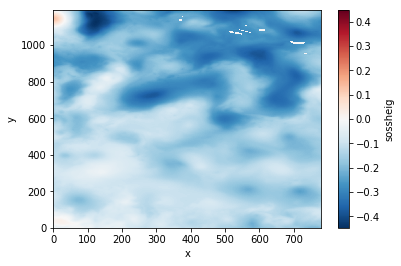

In [40]:
ssh_mean.plot()